In [1]:
# Install necessary libraries
!pip install numpy pandas matplotlib scikit-learn tensorflow keras opencv-python

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os


Training classes: ['freshbanana', 'freshbittergroud', 'freshokra', 'rottencucumber', 'freshtomato', 'rottentomato', 'rottencapsicum', 'rottenbanana', 'freshpotato', 'freshoranges', 'rottenokra', 'freshcapsicum', 'freshapples', 'rottenoranges', 'rottenapples', 'rottenbittergroud', 'freshcucumber', 'rottenpotato']


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


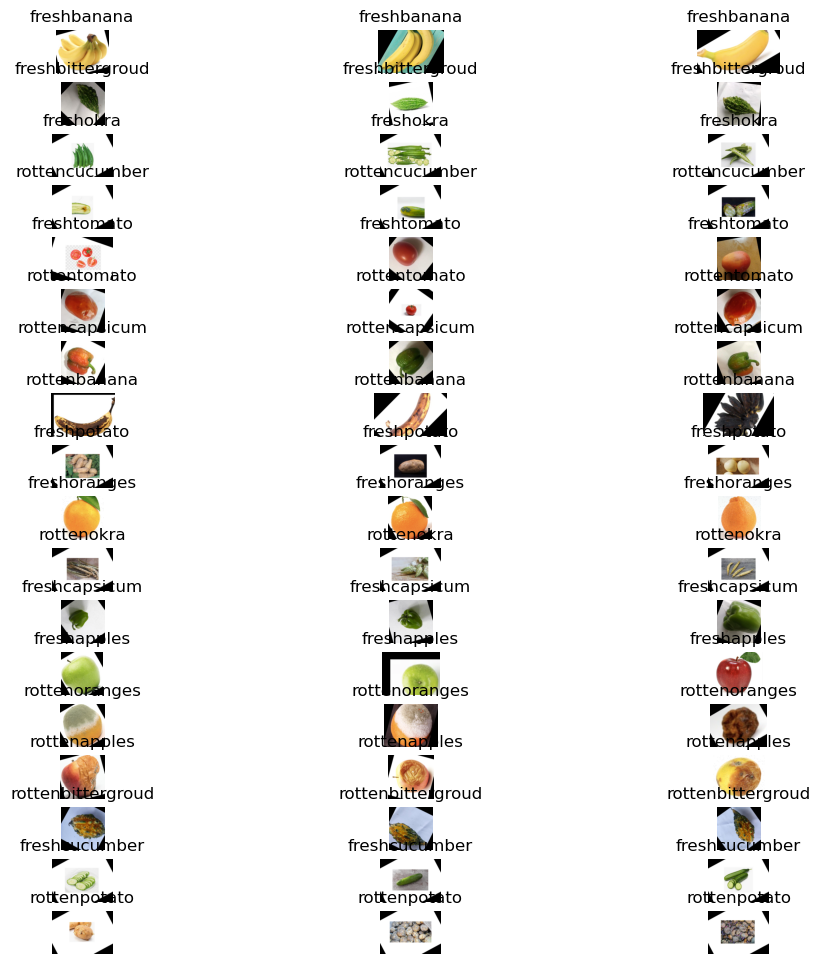

In [2]:
# Define paths
train_dir = 'dataset/Train'
test_dir = 'dataset/Test'

# Explore the dataset
train_classes = os.listdir(train_dir)
print(f"Training classes: {train_classes}")

# Display sample images from each class
def display_sample_images(folder, classes):
    plt.figure(figsize=(12, 12))
    for i, cls in enumerate(classes):
        images = os.listdir(os.path.join(folder, cls))
        for j, img in enumerate(images[:3]):  # Display 3 images per class
            img_path = os.path.join(folder, cls, img)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), 3, i*3 + j + 1)
            plt.imshow(image)
            plt.title(cls)
            plt.axis('off')
    plt.show()

display_sample_images(train_dir, train_classes)


In [3]:
# Data generators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 18901 images belonging to 18 classes.
Found 4718 images belonging to 18 classes.
Found 6738 images belonging to 14 classes.


In [4]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


/Users/ankitsangwan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Users/ankitsangwan/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 285s 479ms/step - accuracy: 0.1066 - loss: -22535964672.0000 - val_accuracy: 0.1045 - val_loss: -595632521216.0000
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 305s 513ms/step - accuracy: 0.1028 - loss: -1859840114688.0000 - val_accuracy: 0.1045 - val_loss: -9323124097024.0000
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 366s 617ms/step - accuracy: 0.1036 - loss: -15860306542592.0000 - val_accuracy: 0.1045 - val_loss: -41026672656384.0000
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 313s 527ms/step - accuracy: 0.1054 - loss: -58569084895232.0000 - val_accuracy: 0.1045 - val_loss: -111794400002048.0000
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 243s 411ms/step - accuracy: 0.0998 - loss: -146314402725888.0000 - val_accuracy: 0.1045 - val_loss: -237137878319104.0000
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 254s 428ms/step - accuracy: 0.1059 - loss: -294222271873024.0000 - val_accuracy: 0.1045 - val_loss: -431661493780480.0000
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 245s 414ms/st

211/211 ━━━━━━━━━━━━━━━━━━━━ 34s 159ms/step - accuracy: 0.1339 - loss: -1666837481783296.0000
Test accuracy: 0.13238349556922913


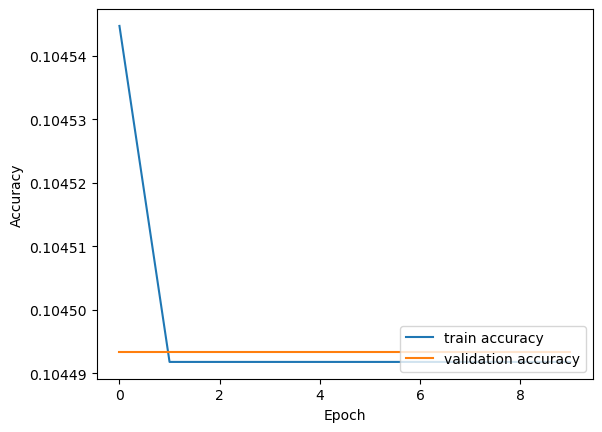

In [5]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

211/211 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step


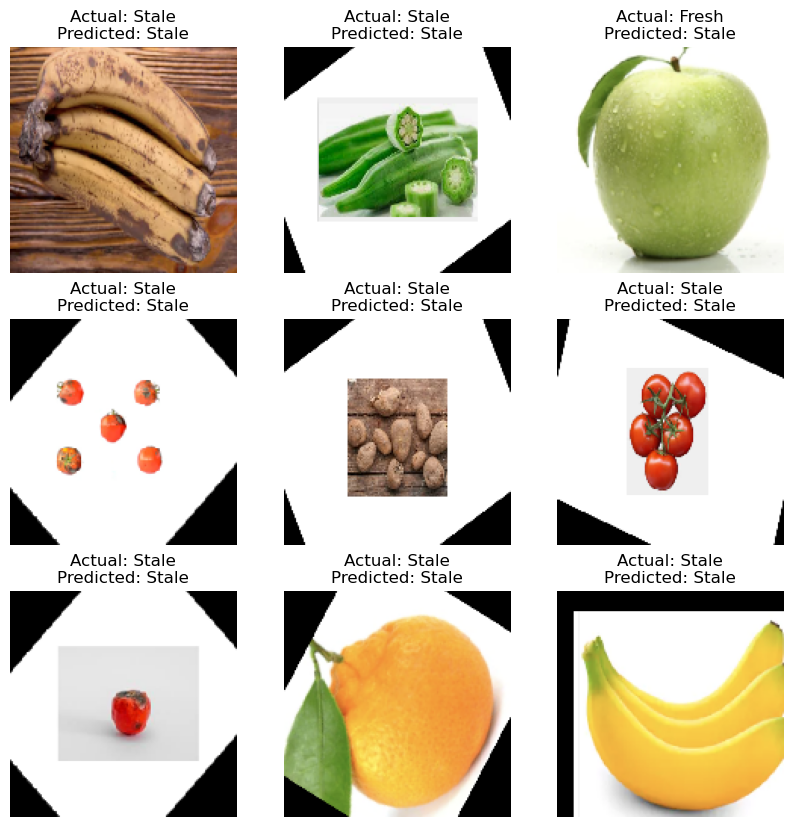

In [8]:
# Analyze and visualize the results
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Display some sample predictions
def display_predictions(generator, predicted_classes):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Actual: {'Fresh' if labels[i] == 0 else 'Stale'}\nPredicted: {'Fresh' if predicted_classes[i] == 0 else 'Stale'}")
        plt.axis('off')
    plt.show()

# Since test_generator is an instance of DirectoryIterator, we need to reset it
test_generator.reset()
display_predictions(test_generator, predicted_classes)
